In [1]:
from src import attributes as a
%load_ext autoreload
%autoreload 2

In [2]:
# Global Variables
stock_name = 'a' # ticker symbol
train = 0 # 1 for train, 0 for pass
days_ahead = 1 # for predicting 1, 3, or 5 days ahead
days_back = -1 # -1 for current data point, -2 for two days ago, etc...
cv = 5 # number of cross validation folds
model_name = 'Random Forest Classifier' # for display on charts, not a tuning parameter

In [3]:
# Extract, Transform, Load, and Train Test Split
# Dictionary of IPO Dates
start_dates = {'a': '11/15/1999'# Updated 1/5/21 1D, 3D, 5D ahead
               , 'aapl':'12/12/1980' # Updated 1/5/21 1D, 3D, 5D ahead
               , 'acy': '01/18/1998' # Updated 1/5/21 1D, 3D, 5D ahead
               , 'adbe': '08/11/1986' # Updated 1/5/21 1D, 3D, 5D ahead
               , 'amd': '03/17/1980' # Updated 1/5/21 1D, 3D, 5D ahead
               , 'baba': '09/15/2014' # Updated 1/5/21 1D, 3D, 5D ahead
               , 'bac': '02/19/1973' # Updated 1/5/21 1D, 3D, 5D ahead
               , 'crm': '06/23/2004' # Updated 1/5/21 1D, 3D, 5D ahead
               , 'esgv': '09/16/2018' # Updated 1/5/21 1D, 3D, 5D ahead
               , 'goog': '08/16/2004' # Updated 1/5/21 1D, 3D, 5D ahead
               , 'ibm': '01/02/1962' # Updated 1/5/21 1D, 3D, 5D ahead
               , 'idex': '05/23/2007' # Updated 1/5/21 1D, 3D, 5D ahead
               , 'intc': '03/16/1980' # Updated 1/5/21 1D, 3D, 5D ahead
               , 'iyw': '05/15/2000' # Updated 1/5/21 1D, 3D, 5D ahead
               , 'ma': '05/21/2006' # Updated 1/5/21 1D, 3D, 5D ahead
               , 'msft': '03/10/1986' # Updated 1/5/21 1D, 3D, 5D ahead
               , 'nio': '09/10/2018' # Updated 1/5/21 1D, 3D, 5D ahead
               , 'nvda': '01/22/1999' # Updated 1/5/21 1D, 3D, 5D ahead
               , 'pypl': '07/05/2015' # Updated 1/5/21 1D, 3D, 5D ahead
               , 'tsla': '06/29/2010' # Updated 1/5/21 1D, 3D, 5D ahead
               , 'v': '03/16/2008' # Updated 1/5/21 1D, 3D, 5D ahead
               , 'vbiv': '09/04/2002' # Updated 1/5/21 1D, 3D, 5D ahead
               , 'vbr': '01/26/2004' # Updated 1/5/21 1D, 3D, 5D ahead
               , 'viov': '09/06/2010' # Updated 1/5/21 1D, 3D, 5D ahead
               , 'vgt': '01/26/2004' # Updated 1/5/21 1D, 3D, 5D ahead
              }

In [4]:
X_train, X_test, y_train, y_test, stock_df = a.data(stock_name, start_dates[stock_name], days_ahead)
stock_df.tail(10)

,High,Low,Open,Close,Volume,Adj Close,oc,hl,adj,5stdev_adj,5sma_adj,direction
Date,,,,,,,,,,,,
2020-12-21,118.449997,115.959999,117.699997,117.779999,2082000.0,117.587158,-0.000680,0.021473,-0.012741,0.010049,0.001816,1
2020-12-22,118.430000,116.849998,118.000000,117.370003,1670400.0,117.177834,0.005339,0.013522,-0.003481,0.010019,0.000006,1
2020-12-23,118.889999,117.220001,118.000000,117.300003,1202100.0,117.107948,0.005932,0.014247,-0.000596,0.010002,0.000142,1
2020-12-24,118.370003,116.839996,117.040001,117.309998,733600.0,117.117928,-0.002307,0.013095,0.000085,0.005990,-0.002792,1
2020-12-28,118.779999,116.669998,118.510002,117.830002,1003100.0,117.637077,0.005738,0.018085,0.004433,0.006407,-0.002460,-1
2020-12-29,119.120003,116.830002,118.559998,117.230003,1007400.0,117.038063,0.011218,0.019601,-0.005092,0.003665,-0.000930,1
2020-12-30,118.900002,117.330002,117.860001,117.389999,1127000.0,117.197800,0.003988,0.013381,0.001365,0.003457,0.000039,1
2020-12-31,118.599998,116.599998,117.589996,118.489998,1307200.0,118.295998,-0.007654,0.017153,0.009370,0.005353,0.002032,-1
2021-01-04,120.089996,117.110001,118.940002,118.639999,2030700.0,118.639999,0.002522,0.025446,0.002908,0.005244,0.002597,1


In [5]:
# GridSerach to find best hyperparameters to prevent overfitting, can be commented out once trained
if train == 1:
    a.rfc_GridSearch(X_train, y_train, stock_name, days_ahead, cv)
elif train == 0:
    pass

In [6]:
# Load RandomForextClassifier Model
rfc_model, y_pred, y_probs = a.rfc(X_train, X_test, y_train, stock_name, days_ahead)

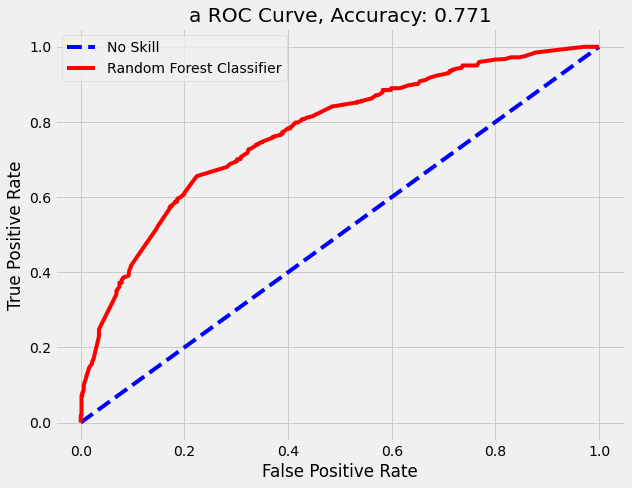

In [7]:
# ROC Curve
a.roc_plot(y_test, y_probs, stock_name, model_name)

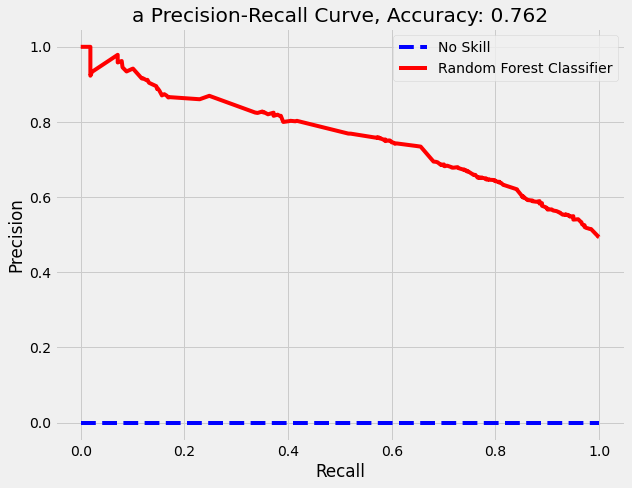

In [8]:
# Precision Recall Curve
a.prec_recall(y_test, y_probs, stock_name, model_name)

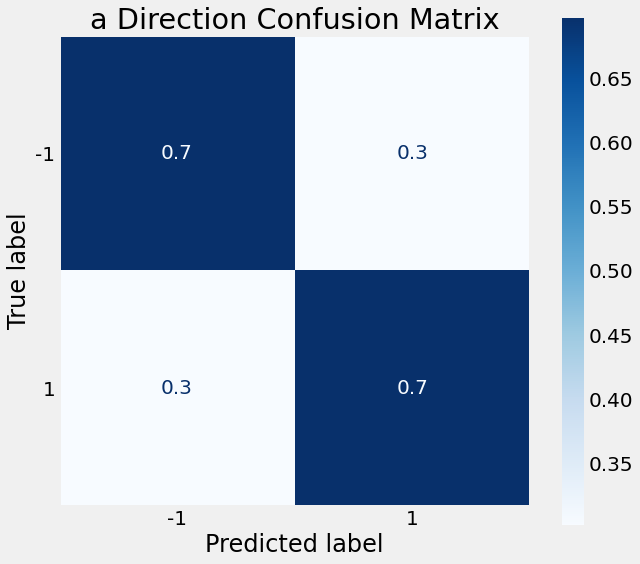

In [9]:
# Confusion Matrix
a.confusion_matrix(rfc_model, X_test, y_test, stock_name)

In [10]:
# Cross Validation
a.cross_validation(rfc_model
                   , stock_df[['oc', 'hl', '5stdev_adj', '5sma_adj']]
                   , stock_df['direction']
                   , cv = 5
                  )

'5 Fold Cross-Validation Score for First RF Model: 0.7237810765466743'

### Prediction...

In [11]:
# Prediction, use last day of data
stock_df.iloc[-1]

High          1.203200e+02
Low           1.180650e+02
Open          1.184800e+02
Close         1.196100e+02
Volume        2.300493e+06
Adj Close     1.196100e+02
oc           -9.537451e-03
hl            1.909962e-02
adj           8.176005e-03
5stdev_adj    5.808201e-03
5sma_adj      3.345444e-03
direction    -1.000000e+00
Name: 2021-01-05 00:00:00, dtype: float64

In [12]:
import numpy as np
last = stock_df[['oc', 'hl', '5stdev_adj', '5sma_adj']].iloc[-days_back]
last

oc           -0.027439
hl            0.046225
5stdev_adj    0.065256
5sma_adj      0.010249
Name: 1999-11-29 00:00:00, dtype: float64

In [13]:
stock_df['adj'].describe()

count    5311.000000
mean        0.000658
std         0.027238
min        -0.270886
25%        -0.010253
50%         0.000670
75%         0.011454
max         0.472222
Name: adj, dtype: float64

In [14]:
if rfc_model.predict(np.array(last).reshape(1, -1))[0] == 1:
    print(f'Buy {stock_name} {days_ahead} day(s) ahead')
else:
    print(f'Sell or hold {stock_name} {days_ahead} day(s) ahead')

Sell or hold a 1 day(s) ahead


### Strategy Returns...

In [15]:
# returns on strategy column
stock_df['prediction'] = rfc_model.predict(stock_df[['oc', 'hl', '5stdev_adj', '5sma_adj']])
stock_df['returns'] = stock_df['adj'].shift(-1, fill_value = stock_df['adj'].median()) * stock_df['prediction']

In [16]:
stock_df.tail(5)

,High,Low,Open,Close,Volume,Adj Close,oc,hl,adj,5stdev_adj,5sma_adj,direction,prediction,returns
Date,,,,,,,,,,,,,,
2020-12-29,119.120003,116.830002,118.559998,117.230003,1007400.0,117.038063,0.011218,0.019601,-0.005092,0.003665,-0.000930,1,1,0.001365
2020-12-30,118.900002,117.330002,117.860001,117.389999,1127000.0,117.197800,0.003988,0.013381,0.001365,0.003457,0.000039,1,1,0.009370
2020-12-31,118.599998,116.599998,117.589996,118.489998,1307200.0,118.295998,-0.007654,0.017153,0.009370,0.005353,0.002032,-1,1,0.002908
2021-01-04,120.089996,117.110001,118.940002,118.639999,2030700.0,118.639999,0.002522,0.025446,0.002908,0.005244,0.002597,1,-1,-0.008176
2021-01-05,120.320000,118.065002,118.480003,119.610001,2300493.0,119.610001,-0.009537,0.019100,0.008176,0.005808,0.003345,-1,-1,-0.000670


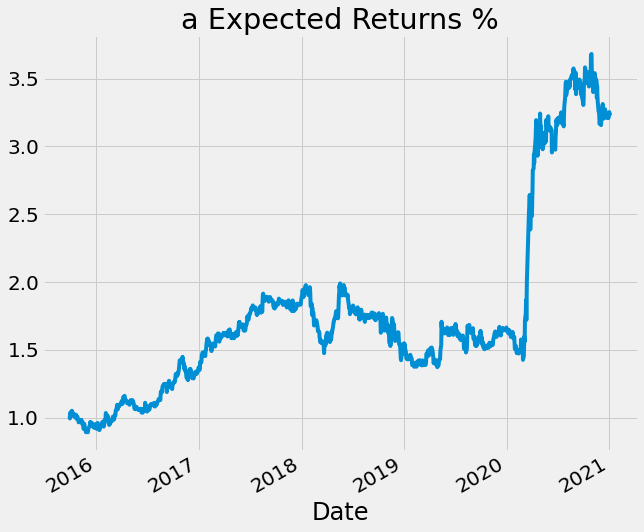

In [17]:
# Don't trade every day!
import matplotlib.pyplot as plt
test_length = len(y_test)
(stock_df['returns'][-test_length:] + 1).cumprod().plot()
plt.title(f'{stock_name} Expected Returns %');

In [18]:
# Model returns if bought on predictions of 1
returns_on_ones = []
for idx in range(-test_length, 0):
    if stock_df['prediction'][idx] == 1:
        returns_on_ones.append(1 + stock_df['returns'][idx])

returns = 1
for x in returns_on_ones:
    returns *= x
returns

3.8065172136664818

In [19]:
# multiple times original investment, not bad but...

In [20]:
# If purchased in 2012 and left it until now
test_idx = int(len(stock_df)*0.75)
(stock_df['Close'][-1] - stock_df['Close'][-test_idx]) / stock_df['Close'][-test_idx]

6.164301152021665

In [21]:
# Buy and hold strategy beats RandomForestClassifier in this study

# Special thanks to Shagufta Tahsildar at https://blog.quantinsti.com/random-forest-algorithm-in-python/

### Training

In [22]:
# this takes a while, 10.5+ hours!
# stocks = [x for x in start_dates]
# days_ahead = [1, 3, 5]
# cv = 5
# for stock in stocks:
#     for days in days_ahead:
#         X_train, X_test, y_train, y_test, stock_df = a.data(stock, start_dates[stock], days)
#         a.rfc_GridSearch(X_train, y_train, stock, days, cv)
# len(stocks)

### Recording Results